In [3]:
import numpy as np 
from parameters import *
from functions import *
import pickle
import matplotlib.pyplot as plt

In [4]:
Qmax = 1.5
Qdim = 500
qlist  = np.linspace(Qmax/Qdim, Qmax, Qdim)
dlist = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
EWs_list = []
EVs_list = []
abs_1s_list = []
abs_2s_list = []

In [5]:
for d in dlist:
    with open(r"results/wellwidths/Qmax={}_Qdim={}_d={}_exciton_EWs.pickle".format(Qmax, Qdim,float(d)), 'rb') as output_file:
        EWs_list.append(pickle.load(output_file))
    with open(r"results/wellwidths/Qmax={}_Qdim={}_d={}_exciton_EVs.pickle".format(Qmax, Qdim,float(d)), 'rb') as output_file:
        EVs_list.append(pickle.load(output_file))
    #with open(r"results/wellwidths/Qmax={}_Qdim={}_d={}_exciton_absorption_1s.pickle".format(Qmax, Qdim,d), 'rb') as output_file:
     #   abs_1s_list.append(pickle.load(output_file))
    #with open(r"results/wellwidths/Qmax={}_Qdim={}_d={}_exciton_absorption_2s.pickle".format(Qmax, Qdim,d), 'rb') as output_file:
    #    abs_2s_list.append(pickle.load(output_file))

In [6]:
i = 1
energyresolution = 1000
E_start = -0.015 #+ 0.012903883497007542 * hbar
E_stop = 0.005  #+ 0.012903883497007542 * hbar

omega_list = np.linspace(E_start/hbar,E_stop/hbar,energyresolution)
E_R_0 = E_R_mu(EWs_list[i],EVs_list[i], 0, omega_0, n_ref, omega_list, d_cv, gamma, qlist)
abs_1s = get_absorption(E_R_0, energyresolution)

abs_1s_2 = alpha_exciton(0, omega_list, EWs_list[i], EVs_list[i], d_cv, gamma, omega_0, n_ref, qlist)

E_R_1 = E_R_mu(EWs_list[i],EVs_list[i], 1, omega_0, n_ref, omega_list, d_cv, gamma, qlist)
abs_2s = get_absorption(E_R_1, energyresolution)

abs_2s_2 = alpha_exciton(1, omega_list, EWs_list[i], EVs_list[i], d_cv, gamma, omega_0, n_ref, qlist)



/usr/local/python3/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/python3/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


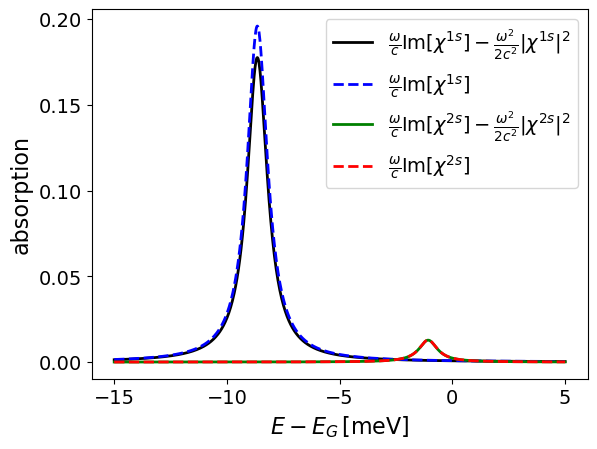

In [10]:
plt.plot(omega_list*hbar*1000, abs_1s,'k-', label = r"$\frac{\omega}{c}\text{Im}[\chi^{1s}] - \frac{\omega^2}{2c^2}|\chi^{1s}|^2$", linewidth = 2)
plt.plot(omega_list*hbar*1000, abs_1s_2,'b--',label = r"$\frac{\omega}{c}\text{Im}[\chi^{1s}]$", linewidth = 2)
plt.plot(hbar*omega_list*1000,abs_2s,'g-', label = r"$\frac{\omega}{c}\text{Im}[\chi^{2s}] - \frac{\omega^2}{2c^2}|\chi^{2s}|^2$", linewidth = 2)
plt.plot(omega_list*hbar*1000, abs_2s_2,'r--',label = r"$\frac{\omega}{c}\text{Im}[\chi^{2s}]$", linewidth = 2)
plt.xlabel(r"$E-E_G\,$[meV]", fontsize = 16)
plt.ylabel('absorption', fontsize = 16)
plt.xticks([-15, -10, -5, 0, 5],fontsize = 14)
plt.yticks([0.00, 0.05, 0.10, 0.15, 0.20],fontsize = 14)
plt.legend(fontsize = 14)
plt.savefig('alpha_comparison_excitons.pdf',bbox_inches = 'tight')
plt.show()

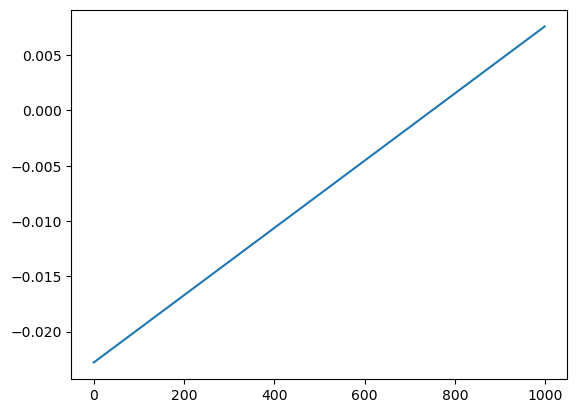

In [7]:
plt.plot(omega_list)